Epoch: 0050 cost= 0.213042468 W= 0.455814 b= -0.682072
Epoch: 0100 cost= 0.197323203 W= 0.443549 b= -0.593838
Epoch: 0150 cost= 0.183419228 W= 0.432014 b= -0.510853
Epoch: 0200 cost= 0.171120852 W= 0.421165 b= -0.432804
Epoch: 0250 cost= 0.160242796 W= 0.410961 b= -0.359396
Epoch: 0300 cost= 0.150621101 W= 0.401363 b= -0.290354
Epoch: 0350 cost= 0.142110556 W= 0.392337 b= -0.225418
Epoch: 0400 cost= 0.134583026 W= 0.383847 b= -0.164345
Epoch: 0450 cost= 0.127924979 W= 0.375862 b= -0.106903
Epoch: 0500 cost= 0.122036010 W= 0.368353 b= -0.0528782
Epoch: 0550 cost= 0.116827309 W= 0.36129 b= -0.00206625
Epoch: 0600 cost= 0.112220347 W= 0.354646 b= 0.0457237
Epoch: 0650 cost= 0.108145669 W= 0.348398 b= 0.0906714
Epoch: 0700 cost= 0.104541756 W= 0.342522 b= 0.132946
Epoch: 0750 cost= 0.101354301 W= 0.336995 b= 0.172706
Epoch: 0800 cost= 0.098535158 W= 0.331797 b= 0.210101
Epoch: 0850 cost= 0.096041813 W= 0.326908 b= 0.245272
Epoch: 0900 cost= 0.093836620 W= 0.32231 b= 0.278352
Epoch: 0950 co

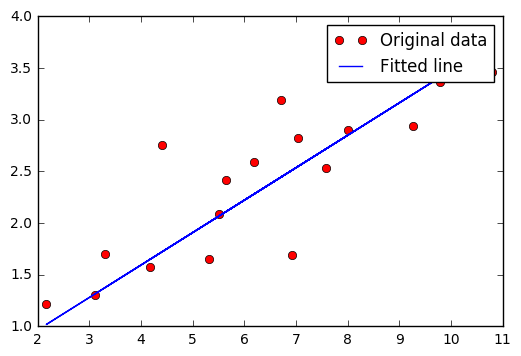

Testing... (Mean square loss Comparison)
Testing cost= 0.0810184
Absolute mean square loss difference: 0.00914305


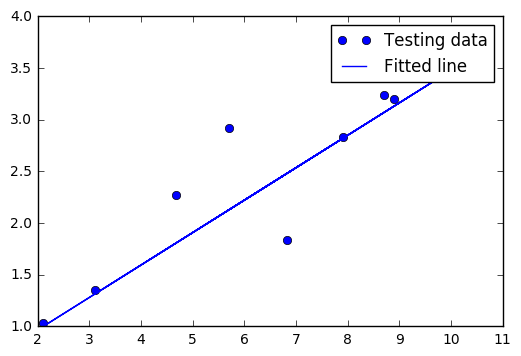

In [4]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 

#parameters 
learning_rate =0.01 
training_epochs =1000 
display_step =50 

#training data 
train_X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

#tf Graph input 
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

#set model weights 
W = tf.Variable(np.random.randn(),name='weight')
b = tf.Variable(np.random.randn(),name='bias')

#construct a linear model 
pred = tf.add(tf.multiply(X,W),b)

#mean squared error 
cost = tf.reduce_sum(tf.square(pred - Y))/(2*n_samples)

#gradient descent 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

#initialize the variables 
init = tf.global_variables_initializer() 

#starting 
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        for (x,y) in zip(train_X,train_Y):
            sess.run(optimizer,feed_dict={X:x,Y:y})
        
        if (epoch+1) % display_step ==0:
            c = sess.run(cost,feed_dict={X:train_X,Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))
    print('optimization finished!')
    
    training_cost = sess.run(cost,feed_dict = {X:train_X,Y:train_Y})
    print('traing cost=',training_cost,'W=',sess.run(W),'b=',sess.run(b))
    
    #graphic display 
    plt.plot(train_X,train_Y,'ro',label ='Original data')
    plt.plot(train_X,sess.run(W)*train_X + sess.run(b),label='Fitted line')
    plt.legend() 
    plt.show() 
    
   # Testing example, as requested (Issue #2)
    test_X = np.array([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = np.array([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])
    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
    tf.reduce_sum(tf.pow(pred -Y,2))/(2*test_X.shape[0]),
        feed_dict = {X:test_X,Y:test_Y}  )
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))
    
    plt.plot(test_X,test_Y,'bo',label='Testing data')
    plt.plot(train_X,sess.run(W)*train_X+sess.run(b),label='Fitted line')
    plt.legend() 
    plt.show() 

            